<a href="https://colab.research.google.com/github/SaraVaseem/COMP569/blob/main/569_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GNN Model Implementation**


In [ ]:
#quicker installation
!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git


Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 84.7 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 35.4 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 25.2 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-4tnl95wz
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-4tnl95wz
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit 628242c85b4be06cfa44f6bf83edae4797cfedd0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 4.1 MB/s eta 0:00:00
  Created wh

In [ ]:
    import torch
    import torch_geometric
    from torch_geometric.data import Data
    from torch_geometric.nn import GCNConv
    import torch.nn.functional as F

In [ ]:
    edge_index = torch.tensor([[0, 1, 1, 2], [1, 0, 2, 1]], dtype=torch.long)
    x = torch.tensor([[-1], [0], [1]], dtype=torch.float)
    data = Data(x=x, edge_index=edge_index)

In [ ]:
    class GCN(torch.nn.Module):
        def __init__(self):
            super(GCN, self).__init__()
            self.conv1 = GCNConv(1, 16)
            self.conv2 = GCNConv(16, 1)

        def forward(self, data):
            x, edge_index = data.x, data.edge_index
            x = F.relu(self.conv1(x, edge_index))
            x = self.conv2(x, edge_index)
            return x

    model = GCN()

In [ ]:
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    for epoch in range(200):
        optimizer.zero_grad()
        out = model(data)
        loss = F.mse_loss(out, torch.tensor([[-1.0], [1.0], [-1.0]], dtype=torch.float))
        loss.backward()
        optimizer.step()
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 1.0139325857162476
Epoch 1, Loss: 0.9909705519676208
Epoch 2, Loss: 0.9748308062553406
Epoch 3, Loss: 0.9629521369934082
Epoch 4, Loss: 0.9537804126739502
Epoch 5, Loss: 0.9462776780128479
Epoch 6, Loss: 0.9398136138916016
Epoch 7, Loss: 0.9339094161987305
Epoch 8, Loss: 0.9283655285835266
Epoch 9, Loss: 0.9235706329345703
Epoch 10, Loss: 0.9190990924835205
Epoch 11, Loss: 0.914439857006073
Epoch 12, Loss: 0.9097701907157898
Epoch 13, Loss: 0.9051089286804199
Epoch 14, Loss: 0.900468111038208
Epoch 15, Loss: 0.8959066271781921
Epoch 16, Loss: 0.8914053440093994
Epoch 17, Loss: 0.886883556842804
Epoch 18, Loss: 0.882239818572998
Epoch 19, Loss: 0.8773913383483887
Epoch 20, Loss: 0.8732545375823975
Epoch 21, Loss: 0.8691956400871277
Epoch 22, Loss: 0.8650640845298767
Epoch 23, Loss: 0.8609123229980469
Epoch 24, Loss: 0.856745719909668
Epoch 25, Loss: 0.8529425263404846
Epoch 26, Loss: 0.8497025966644287
Epoch 27, Loss: 0.8460542559623718
Epoch 28, Loss: 0.8420538902282715


In [ ]:

# Ground truth labels
y_true = torch.tensor([[-1.0], [1.0], [-1.0]], dtype=torch.float)

In [ ]:
# Compute accuracy after training
with torch.no_grad():
    predictions = model(data)

    # Convert predictions to binary labels (-1 or 1)
    predicted_labels = torch.where(predictions >= 0, torch.tensor([1.0]), torch.tensor([-1.0]))

    # Compute accuracy
    correct = (predicted_labels == y_true).sum().item()
    accuracy = correct / y_true.numel()

    print(f'Predicted labels:\n{predicted_labels.numpy()}')
    print(f'Ground truth labels:\n{y_true.numpy()}')
    print(f'Accuracy: {accuracy * 100:.2f}%')

Predicted labels:
[[-1.]
 [ 1.]
 [-1.]]
Ground truth labels:
[[-1.]
 [ 1.]
 [-1.]]
Accuracy: 100.00%


What is this? Training a GNN on 3 nodes (Small). Testing on the training set.


In [ ]:
# Save the model
torch.save(model.state_dict(), "gcn_model.pth")
print("Model saved as gcn_model.pth")

Model saved as gcn_model.pth


In [ ]:
# To load the model later
model_loaded = GCN()
model_loaded.load_state_dict(torch.load("gcn_model.pth"))
model_loaded.eval()  # Set the model to evaluation mode
print("Model loaded successfully!")

Model loaded successfully!


Dataset

In [ ]:
from torch_geometric.datasets import HeterophilousGraphDataset

dataset = HeterophilousGraphDataset(root='.', name='Minesweeper')

Processing...
Done!


In [ ]:
print(dataset)
print("number of graphs:\t\t",len(dataset))
print("number of classes:\t\t",dataset.num_classes)
print("number of node features:\t",dataset.num_node_features)
print("number of edge features:\t",dataset.num_edge_features)
print("class names:\t",dataset.classes)

HeterophilousGraphDataset(name=minesweeper)
number of graphs:		 1
number of classes:		 2
number of node features:	 7
number of edge features:	 0


AttributeError: 'HeterophilousGraphDataset' object has no attribute 'classes'

In [ ]:
print(dataset.data)

Data(x=[10000, 7], edge_index=[2, 78804], y=[10000], train_mask=[10000, 10], val_mask=[10000, 10], test_mask=[10000, 10])


/usr/local/lib/python3.11/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [ ]:
print("edge_index:\t\t",dataset.data.edge_index.shape)
print(dataset.data.edge_index)
print("\n")
print("train_mask:\t\t",dataset.data.train_mask.shape)
print(dataset.data.train_mask)
print("\n")
print("x:\t\t",dataset.data.x.shape)
print(dataset.data.x)
print("\n")
print("y:\t\t",dataset.data.y.shape)
print(dataset.data.y)

edge_index:		 torch.Size([2, 78804])
tensor([[   0,    0,    0,  ..., 9999, 9999, 9999],
        [   1,  100,  101,  ..., 9898, 9899, 9998]])


train_mask:		 torch.Size([10000, 10])
tensor([[False, False, False,  ...,  True, False, False],
        [False,  True,  True,  ...,  True, False,  True],
        [ True,  True, False,  ..., False,  True, False],
        ...,
        [False, False, False,  ..., False, False,  True],
        [ True,  True,  True,  ...,  True, False, False],
        [ True,  True,  True,  ..., False, False,  True]])


x:		 torch.Size([10000, 7])
tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])


y:		 torch.Size([10000])
tensor([0, 1, 0,  ..., 0, 0, 0])


Nice

In [ ]:
print("y shape:", dataset[0].y.shape)
print("Sample y:", dataset[0].y[:10])
print("train_mask shape:", dataset[0].train_mask.shape)
print("Non-zero in train_mask:", dataset[0].train_mask.sum())

y shape: torch.Size([10000])
Sample y: tensor([0, 1, 0, 0, 1, 0, 0, 0, 0, 0])
train_mask shape: torch.Size([10000, 10])
Non-zero in train_mask: tensor(50000)


In [ ]:
    class GCN(torch.nn.Module):
        def __init__(self, in_channels, hidden_channels, out_channels):
            super(GCN, self).__init__()
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)

        def forward(self, data):
            x, edge_index = data.x, data.edge_index
            x = F.relu(self.conv1(x, edge_index))
            x = self.conv2(x, edge_index)
            return x

    data = dataset[0]
    train_mask = data.train_mask.any(dim=1)

    model = GCN(in_channels=dataset.num_node_features, hidden_channels=16, out_channels=dataset.num_classes)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    for epoch in range(200):
        model.train()
        optimizer.zero_grad()
        out = model(data)
        loss = F.cross_entropy(out[train_mask], data.y[train_mask])
        loss.backward()
        optimizer.step()
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.6180638670921326
Epoch 1, Loss: 0.589022159576416
Epoch 2, Loss: 0.564655601978302
Epoch 3, Loss: 0.5445550680160522
Epoch 4, Loss: 0.5283856987953186
Epoch 5, Loss: 0.515764594078064
Epoch 6, Loss: 0.5064384937286377
Epoch 7, Loss: 0.5001710057258606
Epoch 8, Loss: 0.49670088291168213
Epoch 9, Loss: 0.4955049157142639
Epoch 10, Loss: 0.4958668649196625
Epoch 11, Loss: 0.4969862401485443
Epoch 12, Loss: 0.49819812178611755
Epoch 13, Loss: 0.4990293085575104
Epoch 14, Loss: 0.4992034137248993
Epoch 15, Loss: 0.498667448759079
Epoch 16, Loss: 0.49748408794403076
Epoch 17, Loss: 0.49577224254608154
Epoch 18, Loss: 0.49372634291648865
Epoch 19, Loss: 0.4915218949317932
Epoch 20, Loss: 0.4893347918987274
Epoch 21, Loss: 0.487306147813797
Epoch 22, Loss: 0.48553138971328735
Epoch 23, Loss: 0.4840639531612396
Epoch 24, Loss: 0.48291510343551636
Epoch 25, Loss: 0.4820491671562195
Epoch 26, Loss: 0.4814085364341736
Epoch 27, Loss: 0.48091810941696167
Epoch 28, Loss: 0.480496257

In [ ]:
model.eval()

data = dataset[0]
test_mask = data.test_mask.any(dim=1)
out = model(data)
pred = out.argmax(dim=1)

correct = (pred[test_mask] == data.y[test_mask]).sum()
accuracy = int(correct) / int(test_mask.sum())

print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 80.22%


In [ ]:
    from torch_geometric.nn import GCNConv, BatchNorm
    import torch.nn.functional as F
    from torch_geometric.nn import GATConv

In [ ]:
    import torch
    import torch.nn as nn
    import torch.nn.functional as F
    from torch_sparse import spmm
    from torch_geometric.utils import add_self_loops, degree

    class CustomDeepGPRGNN(nn.Module):
        def __init__(self, in_channels, hidden_channels, out_channels, K=10, dropout=0.6, temperature=1.5):
            super(CustomDeepGPRGNN, self).__init__()
            self.K = K
            self.dropout = dropout
            self.temperature = temperature

            self.fc1 = nn.Linear(in_channels, hidden_channels)
            self.bn1 = nn.BatchNorm1d(hidden_channels)

            self.fc2 = nn.Linear(hidden_channels, hidden_channels)
            self.bn2 = nn.BatchNorm1d(hidden_channels)

            self.fc3 = nn.Linear(hidden_channels, hidden_channels)
            self.bn3 = nn.BatchNorm1d(hidden_channels)

            self.fc4 = nn.Linear(hidden_channels, out_channels)

            self.alpha = nn.Parameter(torch.Tensor(K + 1))
            nn.init.constant_(self.alpha, 1.0 / (K + 1))

        def forward(self, data):
            x, edge_index = data.x, data.edge_index
            edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

            row, col = edge_index
            deg = degree(row, x.size(0), dtype=x.dtype)
            deg_inv_sqrt = deg.pow(-0.5)
            deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0
            norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]


            x0 = F.gelu(self.bn1(self.fc1(x)))
            x1 = F.gelu(self.bn2(self.fc2(F.dropout(x0, p=self.dropout, training=self.training))) + x0)
            x2 = F.gelu(self.bn3(self.fc3(F.dropout(x1, p=self.dropout, training=self.training))) + x1)
            x = self.fc4(F.dropout(x2, p=self.dropout, training=self.training))


            x_prop = self.alpha[0] * x
            x_temp = x
            for k in range(1, self.K + 1):
                x_temp = spmm(edge_index, norm, x.size(0), x.size(0), x_temp)
                x_prop += self.alpha[k] * x_temp

            return x_prop / self.temperature


In [ ]:
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=None):
        super().__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, inputs, targets):
        log_probs = F.log_softmax(inputs, dim=1)
        probs = torch.exp(log_probs)
        targets_one_hot = F.one_hot(targets, num_classes=inputs.size(1)).float()

        focal_weight = (1 - probs) ** self.gamma
        loss = -focal_weight * log_probs * targets_one_hot

        if self.alpha is not None:
            alpha = self.alpha[targets].unsqueeze(1)
            loss = loss * alpha

        return loss.sum(dim=1).mean()


In [ ]:
    model = CustomDeepGPRGNN(
        in_channels=dataset.num_node_features,
        hidden_channels=128,
        out_channels=dataset.num_classes,
        K=20,
        dropout=0.2
    )

    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

    criterion = FocalLoss(gamma=2.0, alpha=torch.tensor([1.0, 1.5]).to(data.x.device))

    for epoch in range(150):
        model.train()
        optimizer.zero_grad()
        out = model(dataset[0])
        train_mask = dataset[0].train_mask.any(dim=1)
        loss = criterion(out[train_mask], dataset[0].y[train_mask])
        loss.backward()
        optimizer.step()
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")



Epoch 0, Loss: 0.1665
Epoch 1, Loss: 0.4276
Epoch 2, Loss: 0.2100
Epoch 3, Loss: 0.2212
Epoch 4, Loss: 0.1704
Epoch 5, Loss: 0.1564
Epoch 6, Loss: 0.1575
Epoch 7, Loss: 0.1590
Epoch 8, Loss: 0.1597
Epoch 9, Loss: 0.1601
Epoch 10, Loss: 0.1612
Epoch 11, Loss: 0.1625
Epoch 12, Loss: 0.1632
Epoch 13, Loss: 0.1628
Epoch 14, Loss: 0.1611
Epoch 15, Loss: 0.1595
Epoch 16, Loss: 0.1585
Epoch 17, Loss: 0.1587
Epoch 18, Loss: 0.1589
Epoch 19, Loss: 0.1579
Epoch 20, Loss: 0.1561
Epoch 21, Loss: 0.1545
Epoch 22, Loss: 0.1534
Epoch 23, Loss: 0.1527
Epoch 24, Loss: 0.1516
Epoch 25, Loss: 0.1498
Epoch 26, Loss: 0.1476
Epoch 27, Loss: 0.1456
Epoch 28, Loss: 0.1439
Epoch 29, Loss: 0.1421
Epoch 30, Loss: 0.1401
Epoch 31, Loss: 0.1378
Epoch 32, Loss: 0.1357
Epoch 33, Loss: 0.1339
Epoch 34, Loss: 0.1324
Epoch 35, Loss: 0.1307
Epoch 36, Loss: 0.1293
Epoch 37, Loss: 0.1278
Epoch 38, Loss: 0.1265
Epoch 39, Loss: 0.1253
Epoch 40, Loss: 0.1243
Epoch 41, Loss: 0.1232
Epoch 42, Loss: 0.1224
Epoch 43, Loss: 0.121

In [ ]:
model.eval()

data = dataset[0]
test_mask = data.test_mask.any(dim=1)
out = model(data)
pred = out.argmax(dim=1)

correct = (pred[test_mask] == data.y[test_mask]).sum()
accuracy = int(correct) / int(test_mask.sum())

print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 84.97%



Classification Report:
              precision    recall  f1-score   support

           0     0.8974    0.9171    0.9071      7560
           1     0.6363    0.5804    0.6071      1890

    accuracy                         0.8497      9450
   macro avg     0.7668    0.7487    0.7571      9450
weighted avg     0.8451    0.8497    0.8471      9450



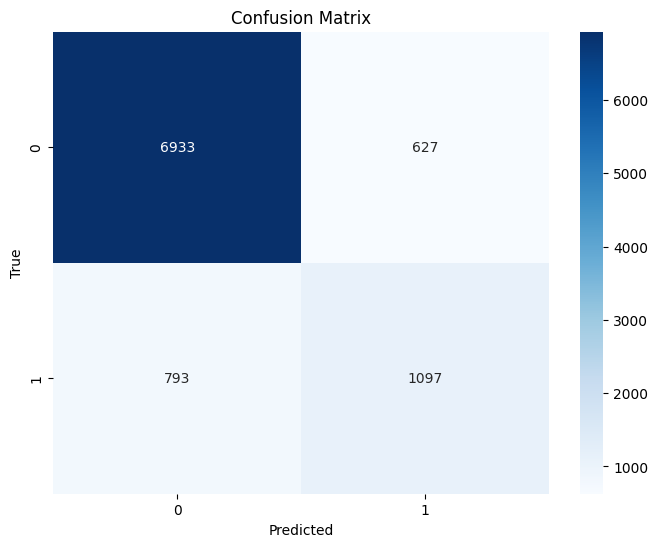

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

model.eval()
data = dataset[0]
test_mask = data.test_mask.any(dim=1)

with torch.no_grad():
    out = model(data)
    preds = out[test_mask].argmax(dim=1).cpu().numpy()
    labels = data.y[test_mask].cpu().numpy()

print("\nClassification Report:")
print(classification_report(labels, preds, digits=4))

cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8, 6))
class_labels = [str(i) for i in range(len(cm))]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
